In [271]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import scipy.stats as stats
import platform

if platform.system() == 'Darwin':
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')

import warnings
warnings.filterwarnings('ignore')

import Modeling3
import imp
imp.reload(Modeling3)
from Modeling3 import Catmodeling

In [272]:
# 날짜 정보가 있는 데이터
data = pd.read_csv('최종_동태.csv')
data.index = pd.to_datetime(data['회계년도'])
data.drop('회계년도', axis=1, inplace=True)

In [273]:
## feature selection을 통해 선택된 원래의 train data
df_train_original = pd.read_csv('동태3겹rus_train_origin.csv')
x_columns = list(df_train_original.drop(['부실여부'], axis=1).columns)
x_columns_target = list(df_train_original.columns)
len(x_columns_target)

18

In [274]:
### 학습데이터, 테스트 데이터로 분할
data_test = data[data.index >= datetime.strptime('2021-12-01', '%Y-%m-%d')]
data_train = data[data.index < datetime.strptime('2021-12-01', '%Y-%m-%d')]

# 회사명과 거래소 코드  정보를 남겨놓기 위한거
data_name = data_train[['회사명', '거래소코드']]

In [275]:
# 원래 데이터와 생성된 가짜 데이터가 섞여있는거
df_train_temp = pd.read_csv('동태3겹rus_train_1.csv')

In [276]:
# 진짜 데이터에 날짜 데이터 부여
df_train_original.index = data_train.index

In [277]:
# 테스트 데이터 불러오기
df_test = pd.read_csv('최종_동태_test.csv')
df_test.index = pd.to_datetime(df_test['회계년도'])
df_test.drop('회계년도', axis=1, inplace=True)

In [278]:
# 'index'라는 새로운 열에 원래 인덱스 저장
df_train_original['index'] = df_train_original.index

# 이제 merge()를 호출하면 'index' 열이 유지됩니다.
df_train = df_train_original[x_columns_target + ['index']].merge(df_train_temp[x_columns_target], how='inner')
df_train.set_index('index', inplace=True)

In [281]:
cat = Catmodeling(df_train, df_test, x_columns)

In [282]:
#### 여기는 csv 파일 불러오는거니 일단은 신경 안써도 됨
param_info = pd.read_csv('Cat_동태3겹_RUS_1.csv')
param_dict = {}
for column in param_info:
    param_dict[column] = param_info[column].iloc[0]
param_dict

{'border_count': 231.0,
 'depth': 8.0,
 'iterations': 134.0,
 'l2_leaf_reg': 2.864888668507134,
 'learning_rate': 0.142470452703684}

In [283]:
# weights = (df_train['부실여부'].value_counts()[0]/df_train['부실여부'].value_counts()[1])
# print(weights)
# class_weights = [1, weights] 
# param_dict['class_weights'] = class_weights

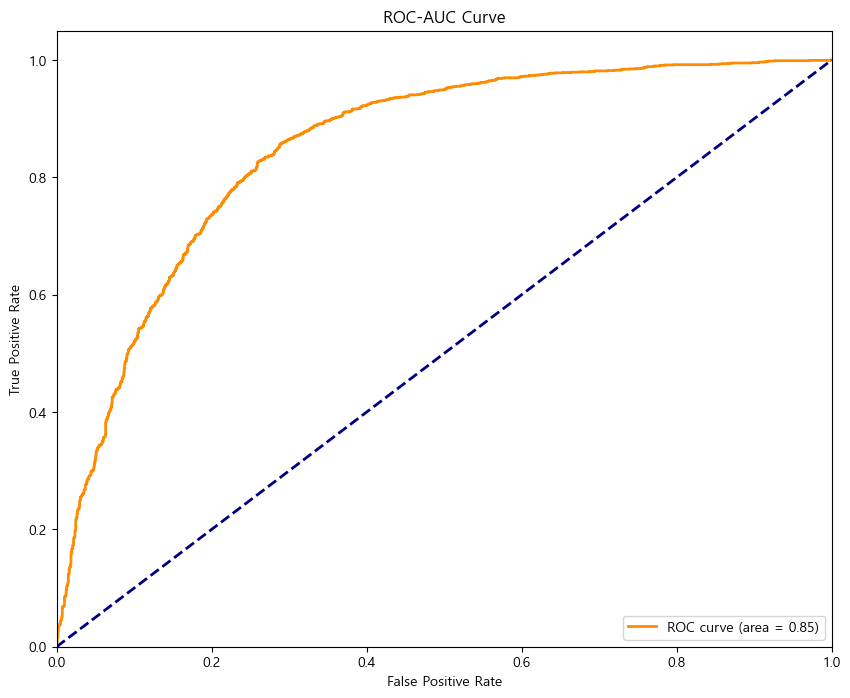

Threshold : 0.11304219386824206
혼돈행렬 : [[ 769 1019]
 [  56 1732]]
정확도 : 0.6994
정밀도 : 0.6296
재현율 : 0.9687
roc_auc 스코어 : 0.8497
f1 스코어 : 0.7632
f2 스코어 : 0.8745




In [284]:
cat.my_modeling(param_dict)